# Problem Statement:

Where should WomenTechWomenYes (WTWY) locate their street teams to collect signatures and promote a gala on October 1st?

We propose to use the most recent week of MTA turnstyle data to locate subway stations with the greatest flows of people.  We will analyze this data to identify and map the best locations and times to dispatch a finite number of street teams.

More specifically, in a engineering statement, using the last four weeks of MTA turnstile data, we should be able to identify and plot the subway stations in New York with the highest flow of people for every 4 hour window in the week.

### Data Format
STATION | DAY | TIME | PEOPLE

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import collections
import numpy as np
import datetime
%matplotlib inline

In [2]:
#import from my challenge 9, for all data

#create a concated dataframe with all week's data
df1 = pd.read_csv('turnstile_180922.txt')
df2 = pd.read_csv('turnstile_180915.txt')
df3 = pd.read_csv('turnstile_180908.txt')
df4 = pd.read_csv('turnstile_180901.txt')
#df = pd.concat([df1, df2, df3, df4])
df=df1


#rename the EXITS column, which has trailing whitespace
df.rename(index=str, columns={df.columns[-1]: "EXITS"}, inplace=True)

#change the DATE and TIME columns into a pd.datetime entity
dt = df.DATE + ' '+ df.TIME
df['DATETIME'] = pd.to_datetime(dt, infer_datetime_format=True)
df=df.sort_values(by='DATETIME')

In [18]:
df['TIME'].value_counts()[0:50]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/15/2018,00:00:00,REGULAR,6759219,2291425,2018-09-15
44981,N026,R102,00-00-04,125 ST,ACBD,IND,09/15/2018,00:00:00,REGULAR,3801601,5405343,2018-09-15
158204,R249,R179,01-00-02,86 ST,456,IRT,09/15/2018,00:00:00,REGULAR,1921256,2051276,2018-09-15
181668,R527,R122,00-03-02,90 ST-ELMHURST,7,IRT,09/15/2018,00:00:00,REGULAR,14790941,4767099,2018-09-15
45023,N026,R102,00-00-05,125 ST,ACBD,IND,09/15/2018,00:00:00,REGULAR,11896970,12393361,2018-09-15


AttributeError: module 'pandas' has no attribute 'time'

In [20]:
#create a dict of lists datastructure, 
#where each Key is (C/A, UNIT, SCP, STATION)
#and each Value is the rest of the data for that observation
#we also filter to remove any observation that is not on our four hour audits
mydict = collections.defaultdict(list)
for row in df.itertuples():
    timecheck = str(row[12].time())
    timecheck = timecheck.split(':')
    if timecheck[1]==timecheck[2]=='00' and int(timecheck[0])%4==0:
        key = (row[1], row[2], row[3], row[4])
        value = [row[5], row[6], row[9], row[12], row[10], row[11]]
        mydict[key].append(value)

In [78]:
test = list(mydict.keys())[0]
len(mydict[test])

timecheck= []
for item in mydict[test]:
    timecheck.append(item[3])
good_example = timecheck
for example in good_example:
    print(example)

error_keys = []

for key in mydict:
    timecheck = []
    for item in mydict[key]:
        timecheck.append(item[3])
    if timecheck != good_example:
        error_keys.append(key)

2018-09-15 00:00:00
2018-09-15 04:00:00
2018-09-15 08:00:00
2018-09-15 12:00:00
2018-09-15 16:00:00
2018-09-15 20:00:00
2018-09-16 00:00:00
2018-09-16 04:00:00
2018-09-16 08:00:00
2018-09-16 12:00:00
2018-09-16 16:00:00
2018-09-16 20:00:00
2018-09-17 00:00:00
2018-09-17 04:00:00
2018-09-17 08:00:00
2018-09-17 12:00:00
2018-09-17 16:00:00
2018-09-17 20:00:00
2018-09-18 00:00:00
2018-09-18 04:00:00
2018-09-18 08:00:00
2018-09-18 12:00:00
2018-09-18 16:00:00
2018-09-18 20:00:00
2018-09-19 00:00:00
2018-09-19 04:00:00
2018-09-19 08:00:00
2018-09-19 12:00:00
2018-09-19 16:00:00
2018-09-19 20:00:00
2018-09-20 00:00:00
2018-09-20 04:00:00
2018-09-20 08:00:00
2018-09-20 12:00:00
2018-09-20 16:00:00
2018-09-20 20:00:00
2018-09-21 00:00:00
2018-09-21 04:00:00
2018-09-21 08:00:00
2018-09-21 12:00:00
2018-09-21 16:00:00
2018-09-21 20:00:00


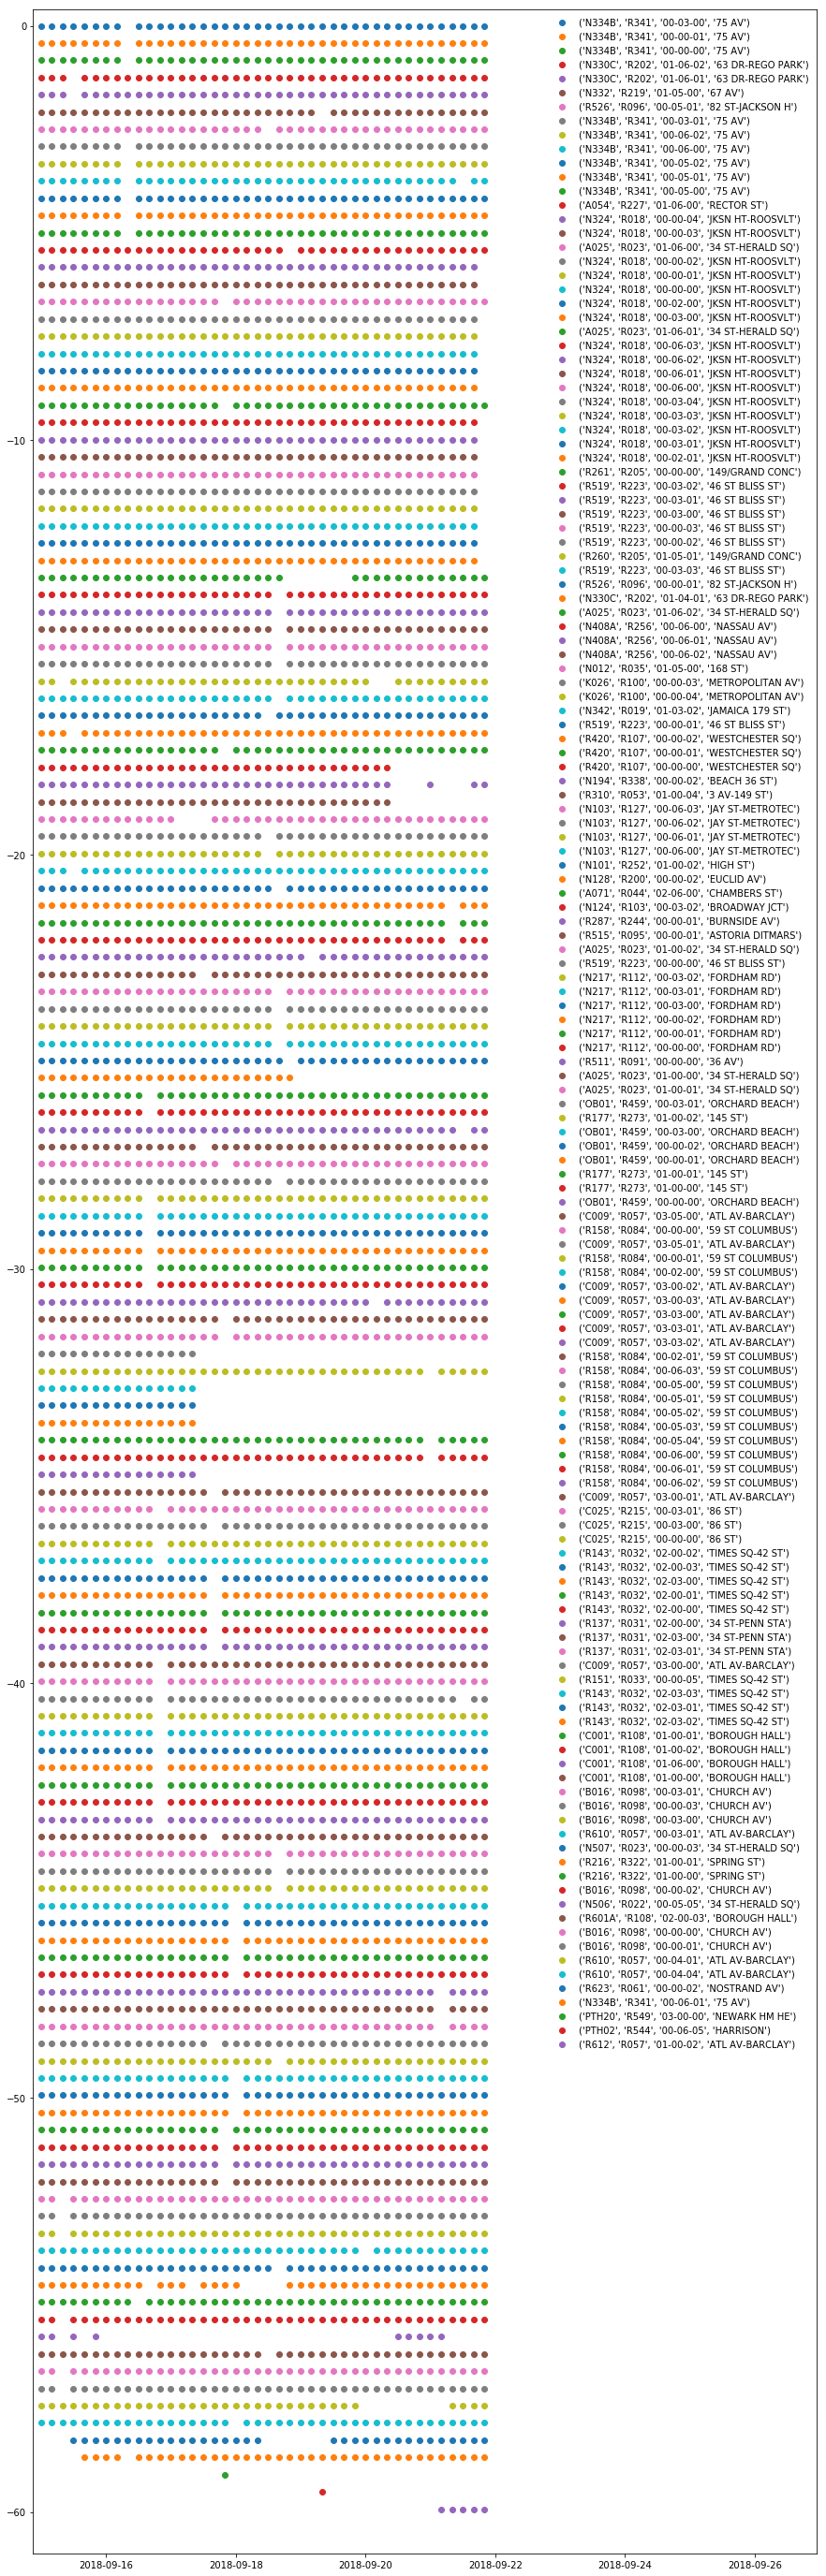

In [108]:
start = datetime.datetime(2018, 9, 14, 21, 0, 0)
stop = datetime.datetime(2018, 9, 26, 23, 0, 0)
i =0

plt.figure(figsize=(15,50))
plt.xlim(start, stop)
plt.ylim(-61, 0.4)

for key in error_keys:
    timecheck = []
    for item in mydict[key]:
        timecheck.append(item[3])
    plt.scatter(timecheck, [i]*len(timecheck), label=key)
    i = i - 0.4162

plt.legend(loc='upper right', frameon=False)
plt.show()

In [21]:
#data cleaning step. We convert the total counts into a count of how many people entered in last four hours.
#we set any negative data points to 0
#and any data points above a threshold value, in this case 75000

challenge2 = collections.defaultdict(list)
threshold = 75000

for key in mydict:
    items = mydict[key]
    lastentry = items[0][4]
    lastexit = items[0][5]
    for item in items:
        check_entry = item[4]-lastentry
        if check_entry < 0:
            check_entry = 0
        if check_entry > threshold :
            check_entry = 0
        check_exit = item[5]-lastexit
        if check_exit < 0:
            check_exit = 0
        if check_exit > threshold :
            check_exit = 0
        value = [item[3], check_entry+check_exit]
        lastentry = item[4]
        lastexit = item[5]
        challenge2[key].append(value)

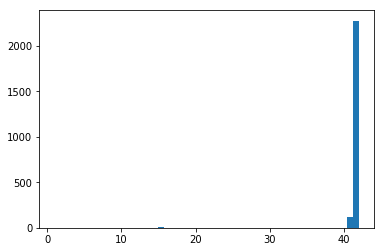

In [25]:
turnstiles =list(challenge2.keys())

timecheck = []

for key in challenge2:
    timecheck.append(len(challenge2[key]))
    
plt.hist(timecheck, bins=50);

In [23]:
#combine all turnstiles for each station
challenge7 = collections.defaultdict(list)

for key in challenge2:
    newkey = (key[3])
    dates = collections.defaultdict(int)
    for entry in challenge2[key]:
        dates[entry[0]] += entry[1]
    for date in dates:
        challenge7[newkey].append([date, dates[date]])

In [27]:
len(mydict)

2419

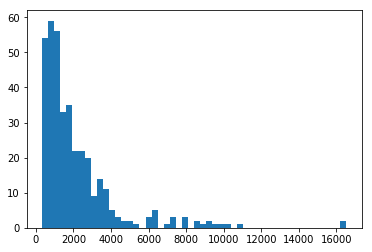

In [30]:
timecheck = []

for key in challenge7:
    timecheck.append(len(challenge7[key]))
    
plt.hist(timecheck, bins=50);